<a href="https://colab.research.google.com/github/Toyetola1/datasets/blob/main/W25_P01_Entrophy_Gini_Taiye_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image

CoffeeData=pd.read_csv("https://raw.githubusercontent.com/Toyetola1/datasets/refs/heads/main/coffee.csv")

CoffeeData.head()


,Unnamed: 0,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,0,36,Female,0,24,73,42789,0.003168,0,1.0
1,1,24,Male,0,44,164,74035,0.520906,0,NaN
2,2,24,Male,0,39,119,30563,0.916005,1,1.0
3,3,20,Male,0,30,107,13166,0.932098,1,NaN
4,4,24,Female,0,20,36,14244,0.965881,0,1.0


In [ ]:
CoffeeData.describe(include='all')


,Unnamed: 0,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
unique,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,350.500000,34.243590,NaN,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,202.794231,13.927945,NaN,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,0.000000,16.000000,NaN,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,175.250000,23.000000,NaN,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,350.500000,28.000000,NaN,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,525.750000,46.000000,NaN,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000


In [ ]:
CoffeeData.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week',
       'spent_month', 'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

CoffeeData.rename(columns={"spent_month":"spent_last_month","spent_week":"spent_last_week","sLrAy":"Salary"},inplace=True)

```


In [ ]:
CoffeeData.rename(columns={"spent_month":"spent_last_month","spent_week":"spent_last_week","SlrAY":"Salary"},inplace=True)

In [ ]:
CoffeeData.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'num_coffeeBags_per_year',
       'spent_last_week', 'spent_last_month', 'Salary', 'Distance', 'Online',
       'Decision'],
      dtype='object')

In [ ]:
CoffeeData["Gender"].describe()

,Gender
count,702
unique,9
top,Male
freq,355


In [ ]:
CoffeeData["Gender"].unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

In [ ]:
CoffeeData["Gender"]=CoffeeData["Gender"].replace(["female","F","f ","FEMALE"],"Female")

In [ ]:
CoffeeData["Gender"]=CoffeeData["Gender"].replace(["MALE","male","M"],"Male")

In [ ]:
CoffeeData["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
CoffeeData["Decision"]=CoffeeData["Decision"].replace(1.0,"YES")
CoffeeData["Decision"]=CoffeeData["Decision"].replace(0.0,"NO")
CoffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               702 non-null    int64  
 1   Age                      702 non-null    int64  
 2   Gender                   702 non-null    object 
 3   num_coffeeBags_per_year  702 non-null    int64  
 4   spent_last_week          702 non-null    int64  
 5   spent_last_month         702 non-null    int64  
 6   Salary                   702 non-null    int64  
 7   Distance                 702 non-null    float64
 8   Online                   702 non-null    int64  
 9   Decision                 474 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 55.0+ KB


In [ ]:
NOPrediction =  CoffeeData.dropna()
NOPrediction["Decision"].describe()

,Decision
count,474
unique,2
top,YES
freq,303


In [ ]:
NOPrediction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 701
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               474 non-null    int64  
 1   Age                      474 non-null    int64  
 2   Gender                   474 non-null    object 
 3   num_coffeeBags_per_year  474 non-null    int64  
 4   spent_last_week          474 non-null    int64  
 5   spent_last_month         474 non-null    int64  
 6   Salary                   474 non-null    int64  
 7   Distance                 474 non-null    float64
 8   Online                   474 non-null    int64  
 9   Decision                 474 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 40.7+ KB


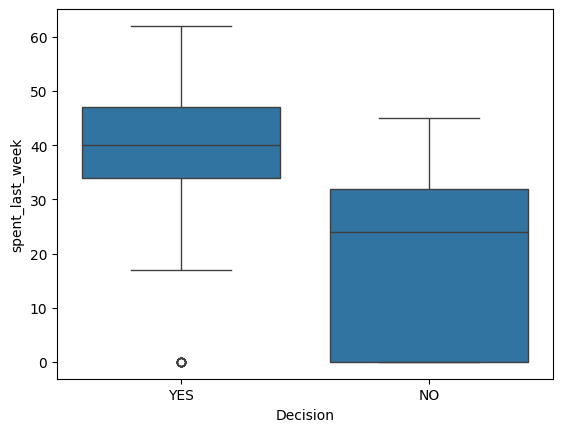

In [ ]:
sns.boxplot(y="spent_last_week",x="Decision",data=NOPrediction)
plt.show()

<Axes: xlabel='Distance', ylabel='spent_last_month'>

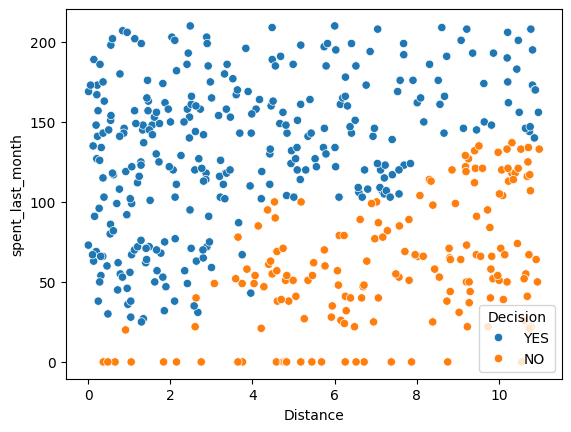

In [ ]:
sns.scatterplot(y="spent_last_month",x="Distance",hue="Decision",data=NOPrediction)

In [ ]:
features = ["Age","Gender","num_coffeeBags_per_year","spent_last_week","spent_last_month","Salary","Distance","Online"]
X = NOPrediction[features]
y = NOPrediction.Decision

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=246)

In [ ]:
y_train.describe()

,Decision
count,355
unique,2
top,YES
freq,225


In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
rs=0
entr_model = tree.DecisionTreeClassifier(criterion="entropy",random_state=rs)
entr_model.fit(X_train,y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=0)

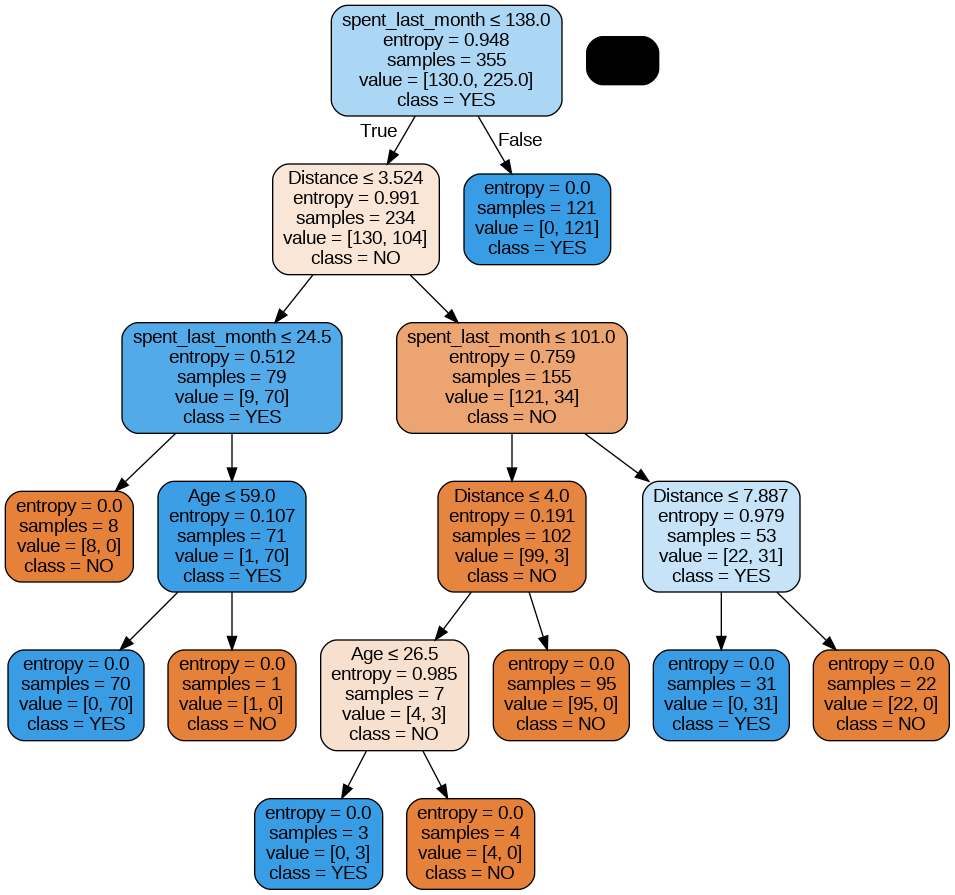

In [ ]:
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,
                class_names = ["NO", "YES"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561


In [ ]:
rs=0
entr_model = tree.DecisionTreeClassifier(criterion="gini",random_state=rs)
entr_model.fit(X_train,y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(random_state=0)

In [ ]:
print("Model Entropy - 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - 3
Accuracy: 0.9831932773109243
Balanced accuracy: 0.9813946216385241
Precision score for "Yes" 0.9871794871794872
Precision score for "No" 0.975609756097561
Recall score for "Yes" 0.9871794871794872
Recall score for "No" 0.975609756097561


In [ ]:
print("Model gini - 4")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model gini - 4
Accuracy: 0.9831932773109243
Balanced accuracy: 0.9813946216385241
Precision score for "Yes" 0.9871794871794872
Precision score for "No" 0.975609756097561
Recall score for "Yes" 0.9871794871794872
Recall score for "No" 0.975609756097561
